In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt2
from scipy.stats import norm
import matplotlib.pyplot as plt
import sys
try:
    import zopfli
except:
    !pip install zopfli
from zopfli.zlib import compress
import operator


In [2]:

def getCompressionsFromSongsDataframe(df):
    compressions = []
    songs = []

    for song in list(df.songLyrics):
        listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song) # gets me a list of words
        processedSong = ''

        for word in listOfWords:
            word = word.lower()
            if word == 'x2':
                continue
            if word == 'x4':
                continue
            processedSong+=word

        compressions.append(getCompressionFromSong(processedSong))
    return compressions


In [4]:
df = pd.read_csv("songs7k.csv")
df.head()
df2 = df

### Compression plotting

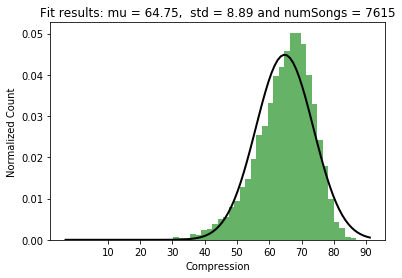

In [6]:

compressions = list(df.compressions)
# Generate some data for this demonstration.
# data = norm.rvs(100.0, 25, size=500)
data= list(df.compressions)
for x in range(len(data)):
    if(data[x]<=0):
        data[x] = -1*data[x]
# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Plot the PDF.
plt.xticks([x for x in range(10, 100, 10)])

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("Compression")
plt.ylabel("Normalized Count")
title = "Fit results: mu = %.2f,  std = %.2f and numSongs = %0.0f" % (mu, std, len(compressions))
plt.title(title)
plt.savefig("image_final/Normal-Distribution-Compression.png" )
plt.show()

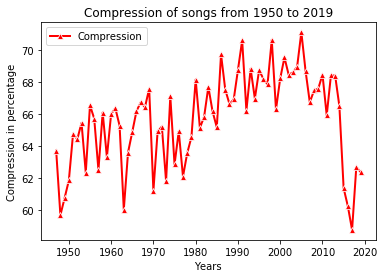

In [8]:
averageCompressionYearWiseData = []
compressionList = []
styleAnalysis = []

def songPreprocessing(song):
    processedSong = ""
    try:
        listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
        processedSong = ''
        for word in listOfWords:
            word = word.lower()
            if word == 'x2':
                continue
            if word == 'x4':
                continue
            processedSong+=word
    except:
        processedSong = ""
    return processedSong

def getCompressionFromSong(song):
    compress_size = sys.getsizeof(compress(song))
    uncomressed_song_size = sys.getsizeof(song.encode())
    compression = (100-(compress_size/uncomressed_song_size)*100)
    return compression

for x in df2.years.unique():
    # get all songs with year == x
    yearCompressions = list(df2[df2.years == x].compressions)
    sumCompressions = int(0)
    countSongsInYear = len(yearCompressions)
    songIndex = 0
    songNames = list(df2[df2.years == x].songName)
    for _compression in yearCompressions:
        compression = _compression
        sumCompressions += compression
        compressionList.append([x,songNames[songIndex], compression])
        songIndex+=1
    averageCompression = sumCompressions/countSongsInYear
    averageCompressionYearWiseData.append([int(x),averageCompression])
    
yearly_compression = np.array(averageCompressionYearWiseData)  
yearly_compression_filtered = []
for x in yearly_compression:
    if(x[0]!=0):
        yearly_compression_filtered.append([x])
yearly_compression_filtered = np.array(yearly_compression_filtered)
sns.lineplot(yearly_compression_filtered[:,0][:,0], yearly_compression_filtered[:,0][:,1], color = "red" ,marker = "^", label = "Compression", linewidth = 2)
plt2.xlabel("Years")
plt2.ylabel("Compression in percentage")
plt2.title("Compression of songs from 1950 to 2019")
plt2.savefig("image_final/Compression-Songs-1950-2019.png" )

# plt.xticks()
plt2.show()


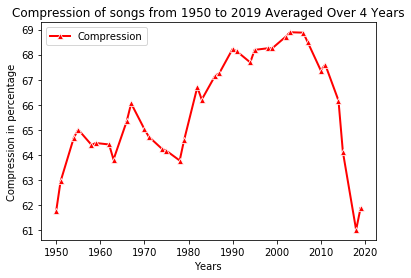

In [9]:
# Use: averages 2d matrix (year: values) to 2d matrix (year/4, average(values) over 4 years)
# input, 2d matrix , years to average on (even numbers 0, 2 , 4 ...)
# output is 2d matrix
def average2DMatrixOverTime(myList, yearNumberToAverage ):
    yearCounter = 1
    averagedList = []
    myYear = 0
    numberYearAverage = yearNumberToAverage
    movingAverage = 0
    for x in myList:
    #     print(x)
        year = x[0]
        rank = x[1]
        movingAverage+=rank
        if(yearCounter == int(numberYearAverage/2)):
            myYear = year

        if yearCounter == numberYearAverage:
            averagedList.append([myYear, movingAverage/numberYearAverage])
            yearCounter = 0
            movingAverage = 0
            
        yearCounter+=1
    return averagedList

def getYearlyCompressionFiltered(df2):
    for x in df2.years.unique():
        # get all songs with year == x
        yearCompressions = list(df2[df2.years == x].compressions)
        sumCompressions = int(0)
        countSongsInYear = len(yearCompressions)
        songIndex = 0
        songNames = list(df2[df2.years == x].songName)
        for _compression in yearCompressions:
            compression = _compression
            sumCompressions += compression
            compressionList.append([x,songNames[songIndex], compression])
            songIndex+=1
        averageCompression = sumCompressions/countSongsInYear
        averageCompressionYearWiseData.append([int(x),averageCompression])

    yearly_compression = np.array(averageCompressionYearWiseData)  
    yearly_compression_filtered = []
    for x in yearly_compression:
        if(x[0]!=0):
            yearly_compression_filtered.append([x])
    return np.array(yearly_compression_filtered)


temp_yearly_compression_filtered = getYearlyCompressionFiltered(df2)
temp_yearly_compression_filtered_Oriented = []
for x in temp_yearly_compression_filtered:
    temp_yearly_compression_filtered_Oriented.append([x[0][0],x[0][1]])
temp_yearly_compression_filtered = temp_yearly_compression_filtered_Oriented

def column(matrix, i):
    return [row[i] for row in matrix]

temp_yearly_compression_filtered = average2DMatrixOverTime(temp_yearly_compression_filtered,4)
sns.lineplot(column(temp_yearly_compression_filtered,0), column(temp_yearly_compression_filtered,1), color = "red" ,marker = "^", label = "Compression", linewidth = 2)
plt2.xlabel("Years")
plt2.ylabel("Compression in percentage")
plt2.title("Compression of songs from 1950 to 2019 Averaged Over 4 Years")
plt2.savefig("image_final/Compression-songs-1950-2019-4-Years.png" )

# plt.xticks()
plt2.show()

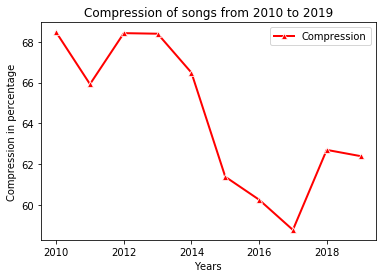

In [10]:
yearWiseCompressionDataFrame =pd.DataFrame()
yearWiseCompressionDataFrame["year"] = yearly_compression[:10][:,0]
yearWiseCompressionDataFrame["compression"] = yearly_compression[:10][:,1]
sns.lineplot(yearly_compression_filtered[:10,0][:,0], yearly_compression_filtered[:10,0][:,1], color = "red" ,marker = "^", label = "Compression", linewidth = 2)
plt2.xlabel("Years")
plt2.ylabel("Compression in percentage")
plt2.title("Compression of songs from 2010 to 2019")
plt2.savefig("image_final/Compression-songs-2010-2019.png" )

# plt.xticks()
plt2.show()

In [8]:
yearWiseCompressionDataFrame

,year,compression
0,2019.0,62.388075
1,2018.0,62.694148
2,2017.0,58.761145
3,2016.0,60.246877
4,2015.0,61.374389
5,2014.0,66.489060
6,2013.0,68.402952
7,2012.0,68.431294
8,2011.0,65.923700
9,2010.0,68.475417


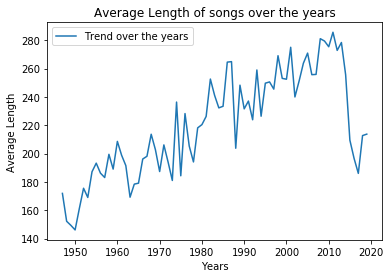

In [11]:
data = pd.read_csv("songs7k.csv")

def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        processedSong+=' '+ word
    return processedSong

lyrics = list(data.songLyrics)
# once we have the songs, lets preprocess the song
preprocessedSongs = []
wordCountVector = []
for song in lyrics:
    processedSong = songPreprocessing(song)
    wordCount = 0
    for word in processedSong.split(" "):
        if(word!='' and word!= ' '):
            wordCount+=1
    wordCountVector.append(wordCount)
    preprocessedSongs.append(processedSong)

# len(wordCountVector), len(preprocessedSongs), preprocessedSongs[1], wordCountVector[1]

data["wordCount"] = wordCountVector
data["preprocessedSong"] = preprocessedSongs

years = {}

allYears = list(data.years)
for year in allYears:
    years[year] = 0
    
myYears = list(data.years)
myWordCount = list(data.wordCount)

yearCountDictionary = {}
songs_in_that_year = {}
for year, wordCount in zip(myYears,myWordCount):
    if(yearCountDictionary.get(year) == None):
        yearCountDictionary[year] = 0
        
    if(songs_in_that_year.get(year) == None):
        songs_in_that_year[year] = 0
    songs_in_that_year[year]+=1
    yearCountDictionary[year] +=wordCount
    
# print(yearCountDictionary, songs_in_that_year)

average_song_length_per_year = {}
for year in years.keys():
    if(year==0):
        continue
    
    average_song_length_per_year[year] = yearCountDictionary[year]/songs_in_that_year[year]
    
        
# print(average_song_length_per_year)


keys = list(average_song_length_per_year.keys())
values =list( average_song_length_per_year.values())

df = pd.DataFrame.from_dict({'Year':keys, 'AverageLength':values})
df


plot_year_values = []
for x,y in zip(keys,values):
    plot_year_values.append([x,y])
    
def column(matrix, i):
    return [row[i] for row in matrix]

sns.lineplot(column(plot_year_values,0) , column(plot_year_values,1), label ="Trend over the years")
plt2.title("Average Length of songs over the years")
plt2.xlabel("Years")
plt2.ylabel("Average Length")
plt2.savefig("image_final/Average-Length-of-songs-over-the-years.png" )

plt2.show()


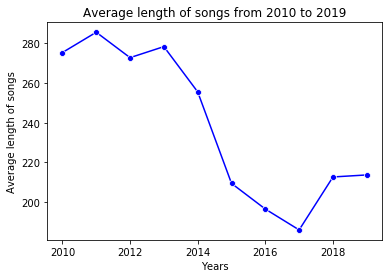

In [12]:
plot_year_values_2010_plus = []
for x,y in zip(keys,values):
    if(x>=2010):
        plot_year_values_2010_plus.append([x,y])
    
import seaborn as sns
def column(matrix, i):
    return [row[i] for row in matrix]

sns.lineplot(column(plot_year_values_2010_plus,0) , column(plot_year_values_2010_plus,1), marker = "o", color = "blue")
plt2.xlabel("Years")
plt2.ylabel("Average length of songs")
plt2.title("Average length of songs from 2010 to 2019")
plt2.savefig("image_final/Average-Length-of-songs-from-2010-to-2019.png" )


# plt.xticks()
plt2.show()

In [13]:
pd.DataFrame(plot_year_values_2010_plus, columns = ["years", "Length"])

,years,Length
0,2019,213.727273
1,2018,212.701087
2,2017,186.017493
3,2016,196.530587
4,2015,209.470405
5,2014,255.584795
6,2013,278.394161
7,2012,272.826389
8,2011,285.634328
9,2010,275.404040


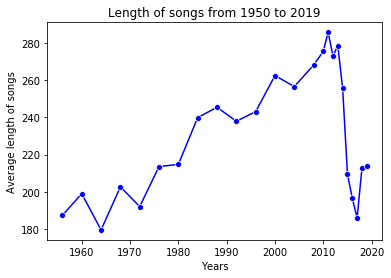

In [14]:
plot_year_values.sort()
plot_year_values

# take 4 years at a time and for year, take the middle year and plot

cycleYear = 4
plot_year_4_years = []
counter = 0
currentYear  = 0
cycleLength = 0
for x in plot_year_values:
    if(x[0] >= 2010):
        cycleYear = 1
        plot_year_4_years.append([x[0], x[1]])
        continue
    elif (x[0]<=1953):
        continue
    year = x[0]
    length = x[1]
    if(counter==(cycleYear/2)):
        currentYear = year  
    cycleLength+=length
    
    counter+=1
    if(counter%(cycleYear)==0):
        plot_year_4_years.append([currentYear, cycleLength/cycleYear])
        cycleLength = 0
        counter = 0
        
sns.lineplot(column(plot_year_4_years,0) , column(plot_year_4_years,1), marker = "o", color = "blue")
plt2.xlabel("Years")
plt2.ylabel("Average length of songs")
plt2.title("Length of songs from 1950 to 2019")
plt2.savefig("image_final/Length-songs-from-1950-to-2019.png" )

# plt.xticks()
plt2.show()

# Word Embedding Analysis and Word Cloud Generation


In [15]:
import nltk
import gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import word2vec
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import operator
from collections import defaultdict
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
data = pd.read_csv("songs7k.csv")

In [17]:
# preprocessing steps

doc=[]
for i in range(data.shape[0]):
    doc.append(nltk.word_tokenize(re.sub('[^a-zA-z\s]','',data['songLyrics'][i].lower())))

count_words = {}
for x in doc:
    for y in x:
        if count_words.get(y)==None:
            count_words[y] = 0
        count_words[y]+=1
         
sorted_weight = sorted(count_words.items(), key=lambda x:x[1], reverse = True
       )
stopWords = sorted_weight[:300]

def column(matrix, index):
    x = []
    for y in matrix:
        x.append(y[index])
    return x

stopWords = column(stopWords,0)
# stopWords[:10]

doc=[]
for i in range(data.shape[0]):
    doc.append(set([x for x in nltk.word_tokenize(re.sub('[^a-zA-z\s]','',data['songLyrics'][i].lower())) if x not in stopWords]))

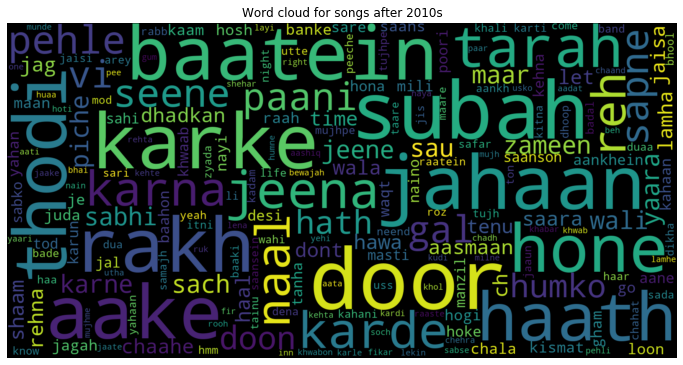

In [18]:
numSongsAfter2010 = len(data[data.years>=2010])

strr=""
for i in doc[0:numSongsAfter2010]:
    for j in i:
        strr=strr+' '+ j
        
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(strr)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word cloud for songs after 2010s")
plt.axis("off")
plt2.savefig("image_final/Word-cloud-for-songs-after-2010s.png" )
plt.show()



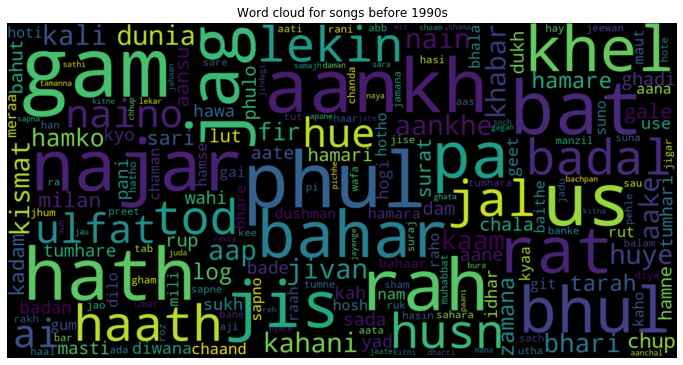

In [19]:
numSongsBefore1990 = len(data[data.years<=1990])

strr=""
for i in doc[(len(df) - numSongsBefore1990):]:
    for j in i:
        strr=strr+' '+ j
        
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(strr)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud for songs before 1990s")
plt2.savefig("image_final/Word-cloud-for-songs-before-2010s.png" )

plt.show()

# Finding the word rank over the years


In [20]:
# for every year, create a list of dictionary
# every dictionary has word and frequency count
# create a global list of words and frequency count as well

data = pd.read_csv("songs7k.csv")
# get all the songs for a year
# return type list ( song1, song2 , ...., songN)
def getSongsForYear(dataframe, columnNameWithYear = "years", year = "2019", songLyricsColumn = "songLyrics"):
    return list(dataframe[data[columnNameWithYear] == year]["songLyrics"])

# preprocesses a single song and returns a song as output
def songPreprocessing(song):
    listOfWords = re.split(r'[;,\s...\n()\'!?.]\s*',song)
    processedSong = ''
    for word in listOfWords:
        word = word.lower()
        if word == 'x2':
            continue
        if word == 'x4':
            continue
        if word == '':
            continue
        processedSong+=word+' '
    return processedSong

def processDataFrame(data):
    allSongs=[]
    for year in data.years.unique():
        songs = getSongsForYear(data, "years", year, "songLyrics")
        for mySong in songs:
            # preprocess the songs
            mySong = songPreprocessing(mySong)
            allSongs.append(mySong)
    return allSongs
        


In [21]:
# create an english dictionary 
englishWords = {}
df = pd.read_excel("wordlist60k.xlsx") # once we have the data
listOfWords = list(df.a)
for word in listOfWords:
    englishWords[word] = True
# now get the words in the dataset
allSongs = processDataFrame(data)
englishWordsData = {}
for song in allSongs:
    l = song.split(" ")
    for word in  l:
        if englishWords.get(word) != None:
            englishWordsData[word] = True
    
len(englishWordsData)
        

4601

In [22]:
# assigns ranks for a year to the words
# input dictionary for a year { word: frequency}
# output  dictionary {word: rank} 
def assignRankToWords(d):
    sortedListOfWords = sorted(d.items(), key = operator.itemgetter(1), reverse = True)
    rankDictionary = {}
    currentRank = 0
    
    # [('hai', 1664),
    #      ('tu', 848),
    #      ('main', 817)] sample sorted list of words
    # since words are reverse sorted so :
    for pair in sortedListOfWords:
        word = pair[0]
        rank = currentRank
        rankDictionary[word] = rank
        currentRank+=1
    return rankDictionary

        

# generate year wise word frequency count in all songs
# input  = data ( songs data)
# output = List of 2 dictionaries [dictionary ( { year : {word: frequency}}  ), globalRankDictionary (year , {word: rank}) ]
def createWordFreqCountPerYear(data):
    listOfDictionary = []
    gDict = {}
    gRankDictionary = {}
    for year in data.years.unique():
        songs = getSongsForYear(data, "years", year, "songLyrics")
        d = {}
        for mySong in songs:
            # preprocess the songs
            mySong = songPreprocessing(mySong)
            listOfWords = mySong.split(" ")
            for word in (listOfWords): # use set here as well
                if d.get(word) == None: 
                    d[word] = 0
                d[word]+=1
        # assign rank to words
        rankDictionary = assignRankToWords(d)
        gRankDictionary[year] = rankDictionary
        gDict[year] = d
            

    return [gDict, gRankDictionary]
#     listOfDictionary.append(gDict)
    

gDict, gRankDictionary = createWordFreqCountPerYear(data) # global dictionary

sorted(gDict[2019].items(), key = operator.itemgetter(1), reverse = True)[:10]
wordFreqDict = gDict[2019]
sorted( wordFreqDict.items(), key=operator.itemgetter(1), reverse = True)[:10]

[('hai', 1664),
 ('tu', 848),
 ('main', 817),
 ('na', 788),
 ('mein', 695),
 ('ho', 659),
 ('ki', 600),
 ('dil', 596),
 ('ke', 591),
 ('se', 535)]

In [23]:
# Word rank for a year
# input  dictionary ( { year : {word: rank}}  ) , word
# output is word rank of a word in several years [ list (year, rank)]
def getWordRanks(gRankDictionary = gRankDictionary, word = "ladki"):
    retList = []
    for year in gRankDictionary.keys():
        if year == 0 :
            continue
        d = gRankDictionary[year]
        if(d.get(word) == None):
            retList.append([year, 1])
        else:
            retList.append([year, d[word]/len(d)])
    
    return retList

# let's merge some of these years and take a moving average

# Use: averages 2d matrix (year: values) to 2d matrix (year/4, average(values) over 4 years)
# input, 2d matrix , years to average on (even numbers 0, 2 , 4 ...)
# output is 2d matrix
def average2DMatrixOverTime(myList, yearNumberToAverage ):
    yearCounter = 1
    averagedList = []
    myYear = 0
    numberYearAverage = yearNumberToAverage
    movingAverage = 0
    for x in myList:
    #     print(x)
        year = x[0]
        rank = x[1]
        movingAverage+=rank
        if(yearCounter == int(numberYearAverage/2)):
            myYear = year

        if yearCounter == numberYearAverage:
            averagedList.append([myYear, movingAverage/numberYearAverage])
            yearCounter = 0
            movingAverage = 0
            
        yearCounter+=1
    return averagedList


# gets column in a n-Dimensional matrix
def column(matrix, index):
    x = []
    for y in matrix:
        x.append(y[index])
            
    return x

word1 = "paisa"
word2 = "ladki"
myList = getWordRanks(gRankDictionary, word1)
myList2 = getWordRanks(gRankDictionary, word2)
myList = sorted(myList,key= operator.itemgetter(0), reverse = False)
myList2 = sorted(myList2,key= operator.itemgetter(0), reverse = False)

averagedList = average2DMatrixOverTime(myList, 4)
averagedList2 = average2DMatrixOverTime(myList2, 4)
# averagedList = sorted(averagedList,key= operator.itemgetter(0), reverse = True)
# averagedList2 = sorted(averagedList2,key= operator.itemgetter(0), reverse = True)
len(column(averagedList,0))

18

Do singlePlot = True to plot or plt.show() to Print
Do singlePlot = True to plot or plt.show() to Print


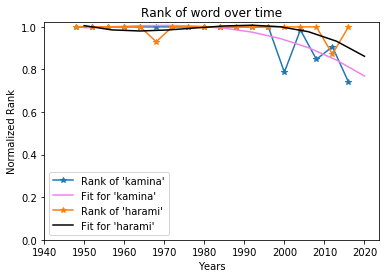

In [25]:
# Input a word and get yearwise rank of the word

#input the word and chart is  ploted automatically 
def plotRankChart(word, gRankDictionary, fitPolynomialDegree = -1, fitPolynomial_X_list = np.array(range(0,1,4)), singlePlot = False, polyFitColor = '' ):
    myList = getWordRanks(gRankDictionary, word)
    myList = sorted(myList,key= operator.itemgetter(0), reverse = False)
    averagedList = average2DMatrixOverTime(myList, 4)
#     sns.lineplot(column(averagedList, 0), column(averagedList, 1),  marker = '*', dashes = False, label = "Rank of \'"+word+"\'")
    
    plt.plot(column(averagedList, 0), column(averagedList, 1),  marker = '*',  label = "Rank of \'"+word+"\'")

    if(fitPolynomialDegree != -1 and fitPolynomialDegree!=0):
        x = fitPolynomial_X_list
        x_knots = column(myList, 0)
        y_knots = column(myList, 1)
        poly_deg = 3
        coefs = np.polyfit(x_knots, y_knots, poly_deg)
        y_poly = np.polyval(coefs, x)

        # plt.scatter(x_knots, y_knots, "o", label="data points")
        if(polyFitColor == ''):
            plt.plot(x, y_poly, label = "Fit for '"+word+"\'")
        else:
            plt.plot(x, y_poly, polyFitColor,  label = "Fit for '"+word+"\'")
    if(singlePlot == True):
        plt.show()
    else:
        print("Do singlePlot = True to plot or plt.show() to Print")
        
        
plotRankChart("kamina", gRankDictionary, 3, np.array(range(1950, 2022, 7)), singlePlot = False, polyFitColor='violet')
plotRankChart("harami", gRankDictionary, 3, np.array(range(1950, 2022, 7)), singlePlot = False, polyFitColor='black')

plt.xticks([x for x in range(1940, 2021, 10)])
plt.yticks([x/10 for x in range(0, 11, 2)])

plt.xlabel("Years")
plt.ylabel("Normalized Rank")
plt.title("Rank of word over time")
plt.savefig("image_final/Rank-swear-words-over-time-kamina-harami.png" )

plt.legend()
plt.show()



Do singlePlot = True to plot or plt.show() to Print
Do singlePlot = True to plot or plt.show() to Print


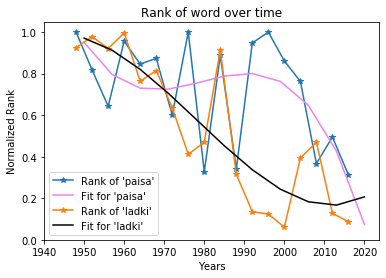

In [26]:
# Input a word and get yearwise rank of the word

#input the word and chart is  ploted automatically 
def plotRankChart(word, gRankDictionary, fitPolynomialDegree = -1, fitPolynomial_X_list = np.array(range(0,1,4)), singlePlot = False, polyFitColor = '' ):
    myList = getWordRanks(gRankDictionary, word)
    myList = sorted(myList,key= operator.itemgetter(0), reverse = False)
    averagedList = average2DMatrixOverTime(myList, 4)
#     sns.lineplot(column(averagedList, 0), column(averagedList, 1),  marker = '*', dashes = False, label = "Rank of \'"+word+"\'")
    
    plt.plot(column(averagedList, 0), column(averagedList, 1),  marker = '*',  label = "Rank of \'"+word+"\'")

    if(fitPolynomialDegree != -1 and fitPolynomialDegree!=0):
        x = fitPolynomial_X_list
        x_knots = column(myList, 0)
        y_knots = column(myList, 1)
        poly_deg = 3
        coefs = np.polyfit(x_knots, y_knots, poly_deg)
        y_poly = np.polyval(coefs, x)

        # plt.scatter(x_knots, y_knots, "o", label="data points")
        if(polyFitColor == ''):
            plt.plot(x, y_poly, label = "Fit for '"+word+"\'")
        else:
            plt.plot(x, y_poly, polyFitColor,  label = "Fit for '"+word+"\'")
    if(singlePlot == True):
        plt.show()
    else:
        print("Do singlePlot = True to plot or plt.show() to Print")
        
        
plotRankChart("paisa", gRankDictionary, 3, np.array(range(1950, 2022, 7)), singlePlot = False, polyFitColor='violet')
plotRankChart("ladki", gRankDictionary, 3, np.array(range(1950, 2022, 7)), singlePlot = False, polyFitColor='black')

plt.xticks([x for x in range(1940, 2021, 10)])
plt.yticks([x/10 for x in range(0, 11, 2)])

plt.xlabel("Years")
plt.ylabel("Normalized Rank")
plt.title("Rank of word over time")
plt.legend()
plt.savefig("image_final/Rank-ladki-paisa-words-over-time-kamina-harami.png" )

plt.show()



In [27]:
wordRanks3d = []
for word in englishWordsData:
    wordRanks3d.append(getWordRanks(gRankDictionary, word))
    
# average the word ranks over the years
len(wordRanks3d)

4601

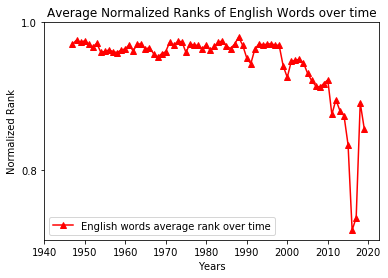

In [29]:
# output [[2019: hello], [2018: hi], [2017: hamara]]
WordToAnalyse = "ladki"
temp = getWordRanks(gRankDictionary, WordToAnalyse)
len(temp)
wordRanks3d[2][0]
averageRanksOfEnglishWordsOverYears = []
for i in range(len(temp)):
    year = 0
    rankSum = 0
    
    for j in range(len(wordRanks3d)):
        year = wordRanks3d[j][i][0]
        rank = wordRanks3d[j][i][1]
        rankSum+=rank
#         print(wordRanks3d[j][i])
        # sum up all the ranks
        
    rankSumAverage = rankSum/len(wordRanks3d)
    averageRanksOfEnglishWordsOverYears.append([year, rankSumAverage])
averageRanksOfEnglishWordsOverYears

plt.plot(column(averageRanksOfEnglishWordsOverYears, 0), column(averageRanksOfEnglishWordsOverYears,1),color = "red", marker = "^", label = "English words average rank over time")
plt.xticks([x for x in range(1940, 2021, 10)])
plt.yticks([x/10 for x in range(8, 12, 2)])

plt.xlabel("Years")
plt.ylabel("Normalized Rank")
plt.title("Average Normalized Ranks of English Words over time")
plt.legend()
plt.savefig("EnglishWordsRanksOverTime.png")
plt.savefig("image_final/Normalized-Rank-English-Words-Over-Time.png" )

plt.show()
# plotRankChart(averageRanksOfEnglishWordsOverYears, gRankDictionary, 3,  np.array(range(1950, 2022, 7)), singlePlot = False, polyFitColor='violet')

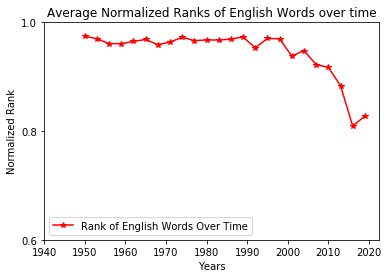

In [29]:
averagedListOfEnglishWords4Years = average2DMatrixOverTime(averageRanksOfEnglishWordsOverYears, 3)

plt.plot(column(averagedListOfEnglishWords4Years, 0), column(averagedListOfEnglishWords4Years,1), color = "red", marker = "*", label = "Rank of English Words Over Time")
plt.xticks([x for x in range(1940, 2021, 10)])
plt.yticks([x/10 for x in range(6, 11, 2)])

plt.xlabel("Years")
plt.ylabel("Normalized Rank")
plt.title("Average Normalized Ranks of English Words over time")
plt.legend()
plt.savefig("image_final/Normalized-Rank-English-Words-Over-Time.png" )

plt.show()